In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_encoded = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_full_ranking_2014_2024_encoded.csv')   

In [3]:
df_encoded.head()

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,...,speciality_sprint_cat,speciality_time_trial_cat,speciality_one_day_races_cat,speciality_hills_cat,speciality_gc_cat_num,speciality_climber_cat_num,speciality_time_trial_cat_num,age_group,age_group_adj,rank_group
0,2014,EISEL Bernhard,Team Sky (WT),2,AT,1981-2-17,1.83,74.0,2277,1126,...,High,Medium,High,Medium,1,0,1,"(30, 35]","(30, 35]",Below 10
1,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1981-6-28,1.82,69.0,506,1537,...,Low,High,Low,Medium,1,1,2,"(30, 35]","(30, 35]",Below 10
2,2014,LÓPEZ David,Team Sky (WT),4,ES,1981-5-13,1.79,68.0,659,2028,...,Low,Medium,Low,Medium,2,1,1,"(30, 35]","(30, 35]",Below 10
3,2014,NIEVE Mikel,Team Sky (WT),5,ES,1984-5-26,1.73,62.0,811,3608,...,Low,Low,Medium,Medium,2,2,0,"(25, 30]","(25, 30]",Below 10
4,2014,PATE Danny,Team Sky (WT),6,US,1979-3-24,1.85,73.0,392,602,...,Low,High,Low,Low,0,0,2,"(30, 35]","(30, 35]",Below 10


In [4]:
# Drop age_group column
df_encoded = df_encoded.drop(columns=['age_group'])

In [5]:
# Drop 'nat_' columns but keep 'nat' column
nat_columns = [col for col in df_encoded.columns if col.startswith('nat_')]
df_encoded = df_encoded.drop(columns=nat_columns)   
df_encoded.head()

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,...,speciality_gc_cat,speciality_sprint_cat,speciality_time_trial_cat,speciality_one_day_races_cat,speciality_hills_cat,speciality_gc_cat_num,speciality_climber_cat_num,speciality_time_trial_cat_num,age_group_adj,rank_group
0,2014,EISEL Bernhard,Team Sky (WT),2,AT,1981-2-17,1.83,74.0,2277,1126,...,Medium,High,Medium,High,Medium,1,0,1,"(30, 35]",Below 10
1,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1981-6-28,1.82,69.0,506,1537,...,Medium,Low,High,Low,Medium,1,1,2,"(30, 35]",Below 10
2,2014,LÓPEZ David,Team Sky (WT),4,ES,1981-5-13,1.79,68.0,659,2028,...,High,Low,Medium,Low,Medium,2,1,1,"(30, 35]",Below 10
3,2014,NIEVE Mikel,Team Sky (WT),5,ES,1984-5-26,1.73,62.0,811,3608,...,High,Low,Low,Medium,Medium,2,2,0,"(25, 30]",Below 10
4,2014,PATE Danny,Team Sky (WT),6,US,1979-3-24,1.85,73.0,392,602,...,Low,Low,High,Low,Low,0,0,2,"(30, 35]",Below 10


In [6]:
# Lits all columns names
df_encoded.columns.tolist()

['year_edition',
 'rider_name',
 'team',
 'bib_number',
 'nationality',
 'birthdate',
 'height',
 'weight',
 'speciality_one_day_races',
 'speciality_gc',
 'speciality_time_trial',
 'speciality_sprint',
 'speciality_climber',
 'speciality_hills',
 'age',
 'bmi',
 'name_clean',
 'rank',
 'climber_cat',
 'speciality_climber_cat',
 'speciality_gc_cat',
 'speciality_sprint_cat',
 'speciality_time_trial_cat',
 'speciality_one_day_races_cat',
 'speciality_hills_cat',
 'speciality_gc_cat_num',
 'speciality_climber_cat_num',
 'speciality_time_trial_cat_num',
 'age_group_adj',
 'rank_group']

In [7]:
df_model_new = df_encoded.copy()

drop_cols = [
    'name_clean', 'birthdate', 'climber_cat', 'speciality_climber_cat', 'speciality_gc_cat',
    'speciality_sprint_cat', 'speciality_time_trial_cat', 'speciality_one_day_races_cat',
    'speciality_hills_cat', 'speciality_gc_cat_num', 'speciality_climber_cat_num',
    'speciality_time_trial_cat_num', 'age_group_adj', 'rank_group'
]

df_model_new.drop(columns=drop_cols, inplace=True)
df_model_new.head()


,year_edition,rider_name,team,bib_number,nationality,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank
0,2014,EISEL Bernhard,Team Sky (WT),2,AT,1.83,74.0,2277,1126,268,684,102,541,33,22.096808,114.0
1,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818,112.0
2,2014,LÓPEZ David,Team Sky (WT),4,ES,1.79,68.0,659,2028,264,1,939,476,33,21.222808,111.0
3,2014,NIEVE Mikel,Team Sky (WT),5,ES,1.73,62.0,811,3608,31,0,4074,486,30,20.715694,18.0
4,2014,PATE Danny,Team Sky (WT),6,US,1.85,73.0,392,602,926,0,126,25,35,21.329438,113.0


In [8]:
# Add experience feature
# Step 1: Sort by rider and year
df_model_new = df_model_new.sort_values(by=['rider_name', 'year_edition'])

# Step 2: Initialize experience column (number of past participations)
df_model_new['experience'] = (
    df_model_new.groupby('rider_name').cumcount()
)


In [9]:
df_model_new.head()

,year_edition,rider_name,team,bib_number,nationality,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank,experience
1296,2023,ABRAHAMSEN Jonas,Uno-X Pro Cycling Team (PRT),202,NO,1.83,78.0,677,149,11,292,86,242,27,23.291230,77.0,0
52,2014,ACEVEDO Janier,Garmin Sharp (WT),92,CO,1.75,63.0,91,582,212,6,304,166,28,20.571429,138.0,0
401,2016,ALAPHILIPPE Julian,Etixx - Quick Step (WT),182,FR,1.73,62.0,6670,2738,1430,774,5331,4658,24,20.715694,39.0,0
628,2018,ALAPHILIPPE Julian,Quick-Step Floors (WT),101,FR,1.73,62.0,6670,2738,1430,774,5331,4658,26,20.715694,30.0,1
703,2019,ALAPHILIPPE Julian,Deceuninck - Quick Step (WT),21,FR,1.73,62.0,6670,2738,1430,774,5331,4658,27,20.715694,5.0,2


In [10]:
# Add median rank per team per edition
# Compute team median rank per year_edition
team_median = (
    df_model_new
    .groupby(['year_edition', 'team'])['rank']
    .median()
    .reset_index()
    .rename(columns={'rank': 'team_median_rank'})
)

# Merge back to df_model_new
df_model_new = df_model_new.merge(team_median, on=['year_edition', 'team'], how='left')
df_model_new.head()

,year_edition,rider_name,team,bib_number,nationality,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank,experience,team_median_rank
0,2023,ABRAHAMSEN Jonas,Uno-X Pro Cycling Team (PRT),202,NO,1.83,78.0,677,149,11,292,86,242,27,23.291230,77.0,0,78.0
1,2014,ACEVEDO Janier,Garmin Sharp (WT),92,CO,1.75,63.0,91,582,212,6,304,166,28,20.571429,138.0,0,61.0
2,2016,ALAPHILIPPE Julian,Etixx - Quick Step (WT),182,FR,1.73,62.0,6670,2738,1430,774,5331,4658,24,20.715694,39.0,0,150.0
3,2018,ALAPHILIPPE Julian,Quick-Step Floors (WT),101,FR,1.73,62.0,6670,2738,1430,774,5331,4658,26,20.715694,30.0,1,59.0
4,2019,ALAPHILIPPE Julian,Deceuninck - Quick Step (WT),21,FR,1.73,62.0,6670,2738,1430,774,5331,4658,27,20.715694,5.0,2,80.0


In [11]:
# List all nationalities
nationalities = df_model_new['nationality'].unique().tolist()
print("Nationalities in the dataset:", nationalities)


Nationalities in the dataset: ['NO', 'CO', 'FR', 'CH', 'PT', 'CR', 'ES', 'JP', 'NZ', 'DE', 'IT', 'DK', 'BE', 'IE', 'US', 'ER', 'PL', 'CA', 'NL', 'SI', 'CZ', 'EC', 'GB', 'AU', 'AT', 'KZ', 'LU', 'ZA', 'IL', 'ET', 'CN', 'EE', 'BY', 'HR', 'RU', 'LT', 'SE', 'LV', 'AR', 'SK']


In [12]:
# Define top countries
top_countries = ['FR', 'ES', 'BE', 'NL', 'IT', 'CO', 'SI', 'DK', 'DE', 'GB', 'US']


In [13]:
# Regional grouping of nationalities
region_map = {
    'PT': 'Southern Europe',
    'BY': 'Eastern Europe',
    'CH': 'Western Europe',
    'PL': 'Eastern Europe',
    'AU': 'Oceania',
    'EC': 'South America',
    'AT': 'Central Europe',
    'LU': 'Western Europe',
    'KZ': 'Central Asia',
    'EE': 'Baltic',
    'IE': 'Western Europe',
    'CA': 'North America',
    'CZ': 'Central Europe',
    'SK': 'Central Europe',
    'NO': 'Nordic',
    'ER': 'Africa',
    'ZA': 'Africa',
    'CR': 'Central America',
    'ET': 'Africa',
    'HR': 'Balkan',
    'JP': 'Asia',
    'LV': 'Baltic',
    'NZ': 'Oceania',
    'IL': 'Middle East',
    'AR': 'South America',
    'LT': 'Baltic',
    'RU': 'Eastern Europe',
    'SE': 'Nordic',
    'CN': 'Asia',
}


In [14]:
# Categorize nationalities
def categorize_nationality(nat):
    if nat in top_countries:
        return nat  # keep as-is
    elif nat in region_map:
        return region_map[nat]
    else:
        return 'Other'


In [15]:
df_model_new['nationality_group'] = df_model_new['nationality'].apply(categorize_nationality)


In [16]:
df_model_new.head()

,year_edition,rider_name,team,bib_number,nationality,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank,experience,team_median_rank,nationality_group
0,2023,ABRAHAMSEN Jonas,Uno-X Pro Cycling Team (PRT),202,NO,1.83,78.0,677,149,11,292,86,242,27,23.291230,77.0,0,78.0,Nordic
1,2014,ACEVEDO Janier,Garmin Sharp (WT),92,CO,1.75,63.0,91,582,212,6,304,166,28,20.571429,138.0,0,61.0,CO
2,2016,ALAPHILIPPE Julian,Etixx - Quick Step (WT),182,FR,1.73,62.0,6670,2738,1430,774,5331,4658,24,20.715694,39.0,0,150.0,FR
3,2018,ALAPHILIPPE Julian,Quick-Step Floors (WT),101,FR,1.73,62.0,6670,2738,1430,774,5331,4658,26,20.715694,30.0,1,59.0,FR
4,2019,ALAPHILIPPE Julian,Deceuninck - Quick Step (WT),21,FR,1.73,62.0,6670,2738,1430,774,5331,4658,27,20.715694,5.0,2,80.0,FR


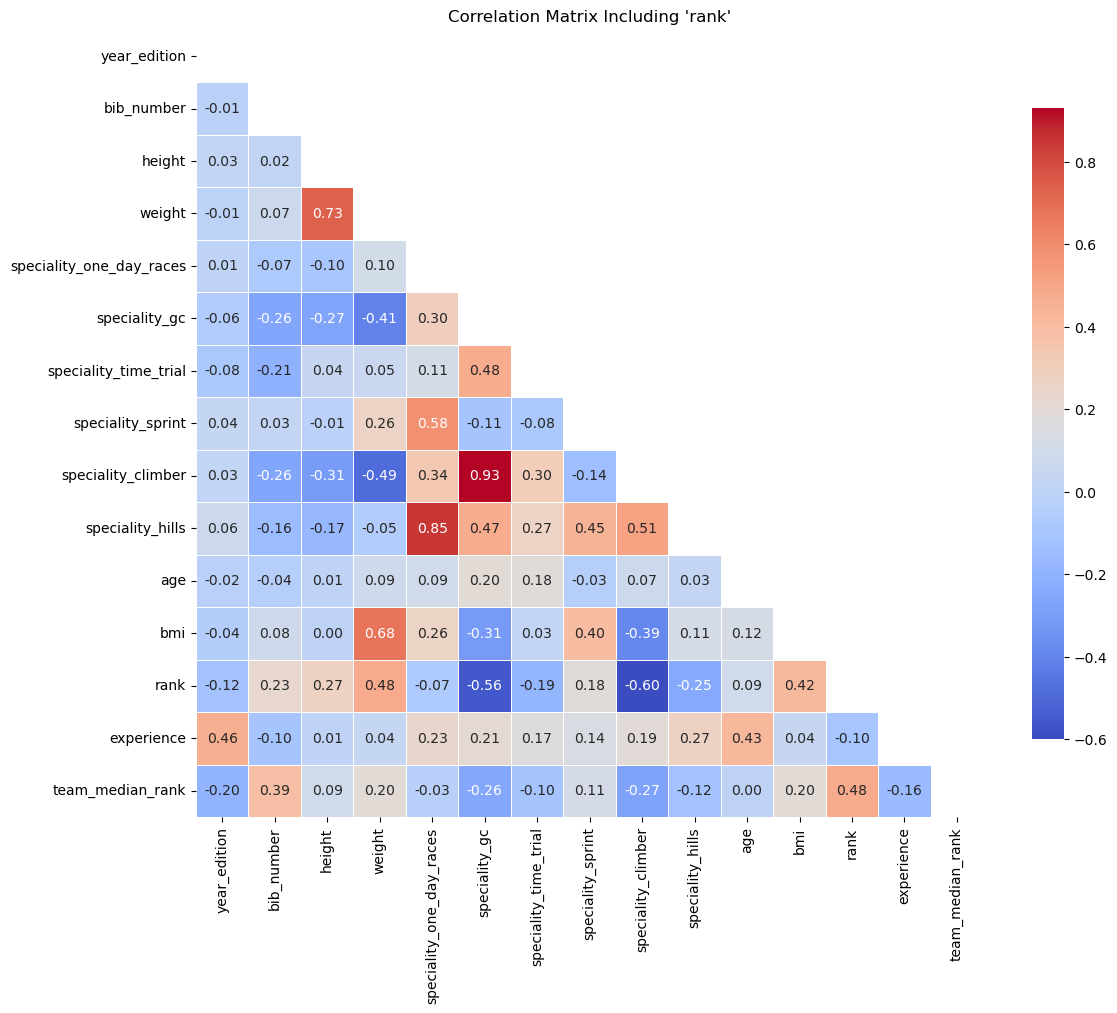

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns, including 'rank'
numeric_cols = df_model_new.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_cols.corr()

# Generate mask for upper triangle (to avoid duplicate values)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix Including 'rank'")
plt.tight_layout()
plt.show()



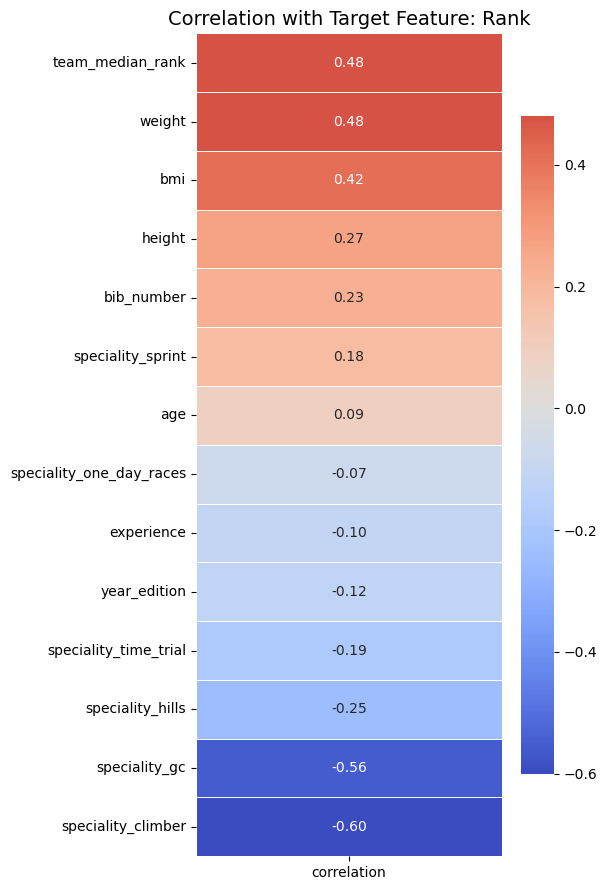

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features you want to compare with rank
features = [
    'age', 'bmi', 'weight', 'height', 'bib_number',
    'speciality_climber', 'speciality_sprint', 'speciality_one_day_races',
    'speciality_time_trial', 'speciality_hills', 'speciality_gc', 'team_median_rank', 'experience', 'year_edition'
]

# Compute correlation matrix including 'rank'
corr = df_model_new[features + ['rank']].corr()

# Extract only correlations with 'rank'
rank_corr = corr['rank'].drop('rank')  # Drop self-correlation

# Format as sorted DataFrame for plotting
corr_df = rank_corr.to_frame(name='correlation').sort_values(by='correlation', ascending=False)

# Plot heatmap
plt.figure(figsize=(6, len(corr_df) * 0.5 + 2))
sns.heatmap(
    corr_df,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    yticklabels=True
)

plt.title('Correlation with Target Feature: Rank', fontsize=14)
plt.tight_layout()
plt.show()



C:\Users\raclo\AppData\Local\Temp\ipykernel_33700\920901454.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values_sorted, y=labels_sorted, palette=colors, orient='h')


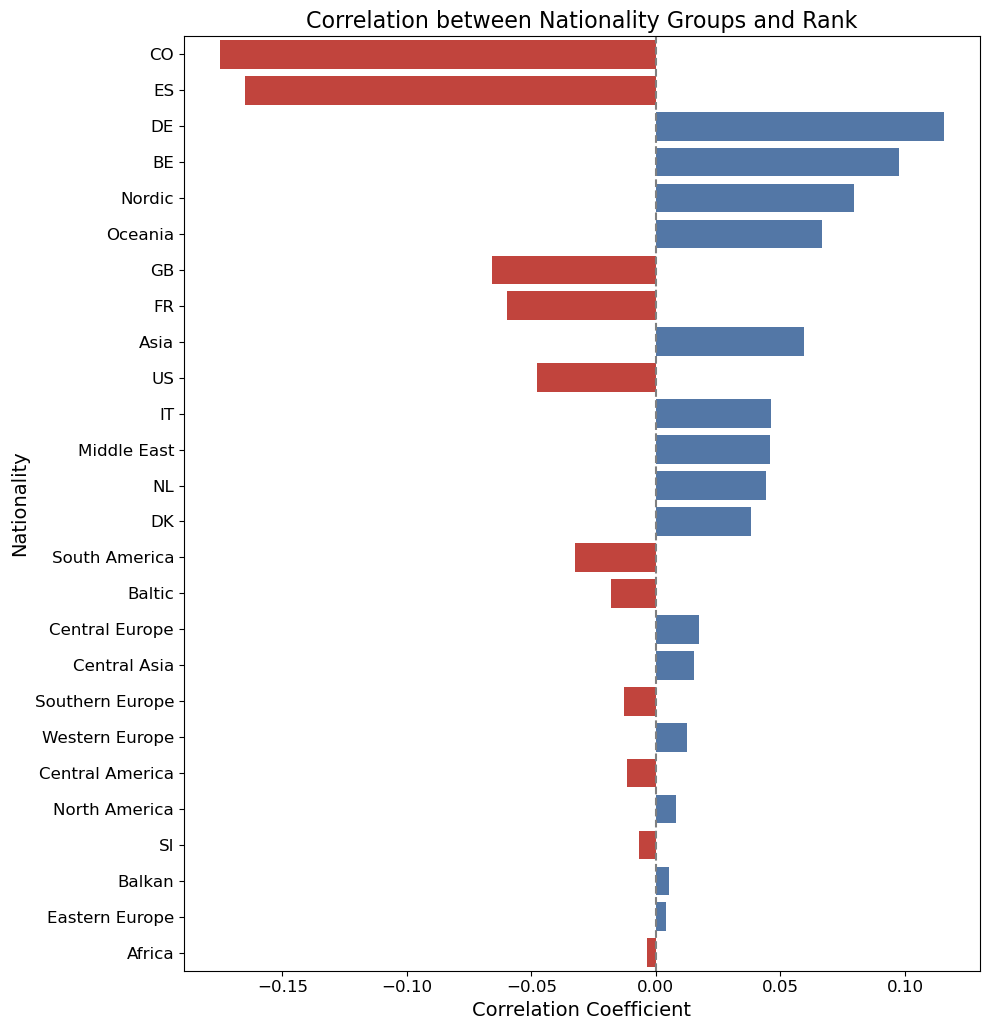

In [20]:
# Correlation between nationality groups and rank
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encode nationality_group
nat_dummies = pd.get_dummies(df_model_new['nationality_group'], prefix='nationality_group')

# Compute correlation with rank
nat_corr = nat_dummies.join(df_model_new['rank']).corr()['rank'].drop('rank')

# Shorten labels by removing prefix
labels_short = [col.replace('nationality_group_', '') for col in nat_corr.index]

# Prepare data for plotting (keep sorted by absolute correlation)
corr_values = nat_corr.values
sorted_indices = abs(corr_values).argsort()[::-1]  # descending by abs value

# Reorder labels and values accordingly
labels_sorted = [labels_short[i] for i in sorted_indices]
values_sorted = corr_values[sorted_indices]

# Color: blue for positive, red for negative
colors = ['#4575b4' if v > 0 else '#d73027' for v in values_sorted]

# Plot with bigger figure and adjusted label size
plt.figure(figsize=(10, max(6, len(labels_sorted)*0.4)))  # height grows with number of labels

sns.barplot(x=values_sorted, y=labels_sorted, palette=colors, orient='h')

plt.axvline(0, color='gray', linestyle='--')
plt.title('Correlation between Nationality Groups and Rank', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Nationality', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [21]:
# Define 4 feature sets
feature_sets = {
    'base_features': [
        'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank', 'bib_number', 'year_edition'
    ],
    'specialities': [
        'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
        'speciality_sprint', 'speciality_climber', 'speciality_hills'
    ],
    'base_plus_specialities': [
        'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank', 'bib_number', 'year_edition',
        'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
        'speciality_sprint', 'speciality_climber', 'speciality_hills'
    ],
    'all_features': [
        'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank', 'bib_number', 'year_edition',
        'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
        'speciality_sprint', 'speciality_climber', 'speciality_hills',
        'nationality_group'
    ],
}


In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.metrics._regression")

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Define your feature sets
feature_sets = {
    'base_features': [
        'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank', 'bib_number', 'year_edition'
    ],
    'specialities': [
        'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
        'speciality_sprint', 'speciality_climber', 'speciality_hills'
    ],
    'base_plus_specialities': [
        'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank', 'bib_number', 'year_edition',
        'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
        'speciality_sprint', 'speciality_climber', 'speciality_hills'
    ],
    'all_features': [
        'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank', 'bib_number', 'year_edition',
        'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
        'speciality_sprint', 'speciality_climber', 'speciality_hills',
        'nationality_group'
    ],
}


def train_evaluate_model(df, features, target='rank', test_size=0.2, random_state=42):
    # Separate numeric and categorical features
    categorical_features = [f for f in features if df[f].dtype == 'object' or str(df[f].dtype).startswith('category')]
    numeric_features = [f for f in features if f not in categorical_features]

    X = df[features]
    y = df[target]

    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Preprocessing pipeline
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    # Full pipeline: preprocessing + Random Forest model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=100,
            random_state=random_state,
            max_features='sqrt'  # <- explicitly set to avoid future warnings
        ))
    ])

    # Train
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return pipeline, {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Run experiments for each feature set
results_list = []

for name, features in feature_sets.items():
    print(f"Training model with feature set: {name}")
    model, results = train_evaluate_model(df_model_new, features)
    print(f"Results: MAE={results['MAE']:.2f}, RMSE={results['RMSE']:.2f}, R2={results['R2']:.3f}\n")
    results_list.append({'feature_set': name, **results})

# Display summary sorted by RMSE
results_df = pd.DataFrame(results_list).sort_values(by='RMSE')
print(results_df)


Training model with feature set: base_features
Results: MAE=27.41, RMSE=34.75, R2=0.372

Training model with feature set: specialities
Results: MAE=23.93, RMSE=32.42, R2=0.453

Training model with feature set: base_plus_specialities
Results: MAE=22.00, RMSE=29.12, R2=0.559

Training model with feature set: all_features
Results: MAE=22.25, RMSE=29.27, R2=0.554

              feature_set        MAE       RMSE        R2
2  base_plus_specialities  21.997092  29.120022  0.559030
3            all_features  22.251548  29.270228  0.554469
1            specialities  23.931304  32.418540  0.453471
0           base_features  27.412979  34.745172  0.372209


In [23]:
pip install xgboost lightgbm


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Multi-model comparison
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Feature set (pick one or test others in loop)
features = [
    'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank',
    'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
    'speciality_sprint', 'speciality_climber', 'speciality_hills',
    'nationality_group'
]

# Define models to test
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse', verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42),
    'Ridge': Ridge(random_state=42)
}

# Separate features
categorical_features = [f for f in features if df_model_new[f].dtype == 'object' or str(df_model_new[f].dtype).startswith('category')]
numeric_features = [f for f in features if f not in categorical_features]

X = df_model_new[features]
y = df_model_new['rank']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining model: {name}")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})

# Display sorted results
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\n🔍 Model Comparison:")
print(results_df)


In [ ]:
# Plotting results  
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")
# Create a bar plot for model performance
plt.figure(figsize=(10, 6))
sns.barplot(
    x='RMSE', 
    y='Model', 
    data=results_df, 
    palette='viridis'
)
plt.title('Model Performance Comparison (RMSE)')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Model')
plt.axvline(x=results_df['RMSE'].min(), color='red', linestyle='--', label='Best Model')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import warnings
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.metrics._regression")

# Define feature sets
feature_sets = {
    'base_features': [
        'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank', 'bib_number', 'year_edition'
    ],
    'specialities': [
        'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
        'speciality_sprint', 'speciality_climber', 'speciality_hills'
    ],
    'base_plus_specialities': [
        'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank', 'bib_number', 'year_edition',
        'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
        'speciality_sprint', 'speciality_climber', 'speciality_hills'
    ],
    'all_features': [
        'height', 'weight', 'age', 'bmi', 'experience', 'team_median_rank', 'bib_number', 'year_edition',
        'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial',
        'speciality_sprint', 'speciality_climber', 'speciality_hills',
        'nationality_group'
    ],
}

# Define models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42)
}

# Store results
results_list = []

# Loop over feature sets
for set_name, features in feature_sets.items():
    print(f"\n🔍 Testing feature set: {set_name}")
    
    # Separate numeric/categorical
    categorical = [f for f in features if df_model_new[f].dtype == 'object' or str(df_model_new[f].dtype).startswith('category')]
    numeric = [f for f in features if f not in categorical]
    
    # Split
    X = df_model_new[features]
    y = df_model_new['rank']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocessor
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ])
    
    # Loop over models
    for model_name, model in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results_list.append({
            'feature_set': set_name,
            'model': model_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })

        print(f"✅ {model_name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

# Results summary
results_df = pd.DataFrame(results_list).sort_values(by='RMSE')
print("\n📊 Summary (sorted by RMSE):")
print(results_df)



🔍 Testing feature set: base_features
✅ RandomForest → MAE: 27.41, RMSE: 34.75, R²: 0.372
✅ GradientBoosting → MAE: 27.48, RMSE: 35.13, R²: 0.358
✅ Ridge → MAE: 28.32, RMSE: 35.33, R²: 0.351
✅ Lasso → MAE: 28.31, RMSE: 35.30, R²: 0.352
✅ DecisionTree → MAE: 33.01, RMSE: 44.23, R²: -0.017

🔍 Testing feature set: specialities
✅ RandomForest → MAE: 23.93, RMSE: 32.42, R²: 0.453
✅ GradientBoosting → MAE: 23.69, RMSE: 31.07, R²: 0.498
✅ Ridge → MAE: 28.01, RMSE: 34.39, R²: 0.385
✅ Lasso → MAE: 27.92, RMSE: 34.26, R²: 0.390
✅ DecisionTree → MAE: 26.34, RMSE: 35.51, R²: 0.344

🔍 Testing feature set: base_plus_specialities
✅ RandomForest → MAE: 22.00, RMSE: 29.12, R²: 0.559
✅ GradientBoosting → MAE: 22.53, RMSE: 29.34, R²: 0.552
✅ Ridge → MAE: 24.58, RMSE: 31.20, R²: 0.494
✅ Lasso → MAE: 24.60, RMSE: 31.19, R²: 0.494
✅ DecisionTree → MAE: 26.47, RMSE: 38.15, R²: 0.243

🔍 Testing feature set: all_features
✅ RandomForest → MAE: 22.25, RMSE: 29.27, R²: 0.554
✅ GradientBoosting → MAE: 22.69, RMSE:

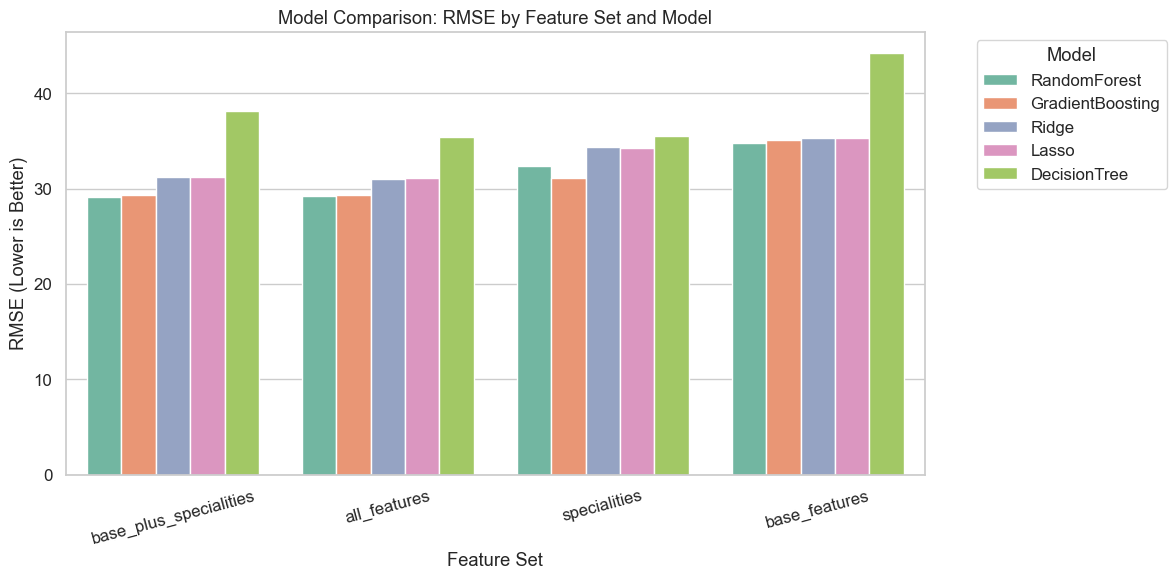

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", font_scale=1.1)

# Create a barplot for RMSE
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_df,
    x='feature_set',
    y='RMSE',
    hue='model',
    palette='Set2'
)
plt.title('Model Comparison: RMSE by Feature Set and Model')
plt.ylabel('RMSE (Lower is Better)')
plt.xlabel('Feature Set')
plt.xticks(rotation=15)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


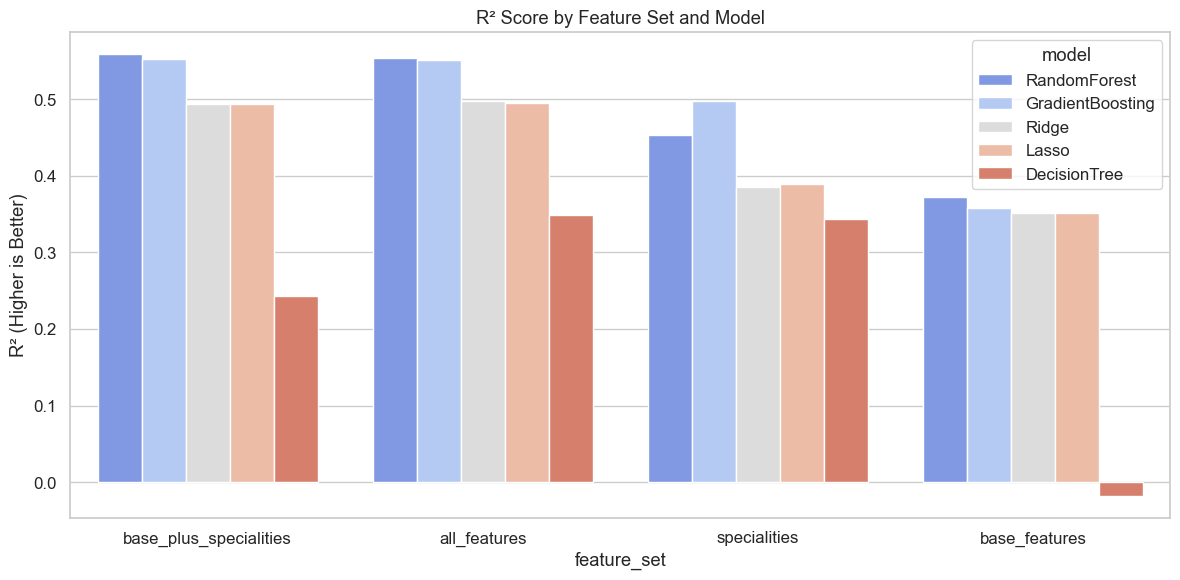

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='feature_set', y='R2', hue='model', palette='coolwarm')
plt.title('R² Score by Feature Set and Model')
plt.ylabel('R² (Higher is Better)')
plt.tight_layout()
plt.show()


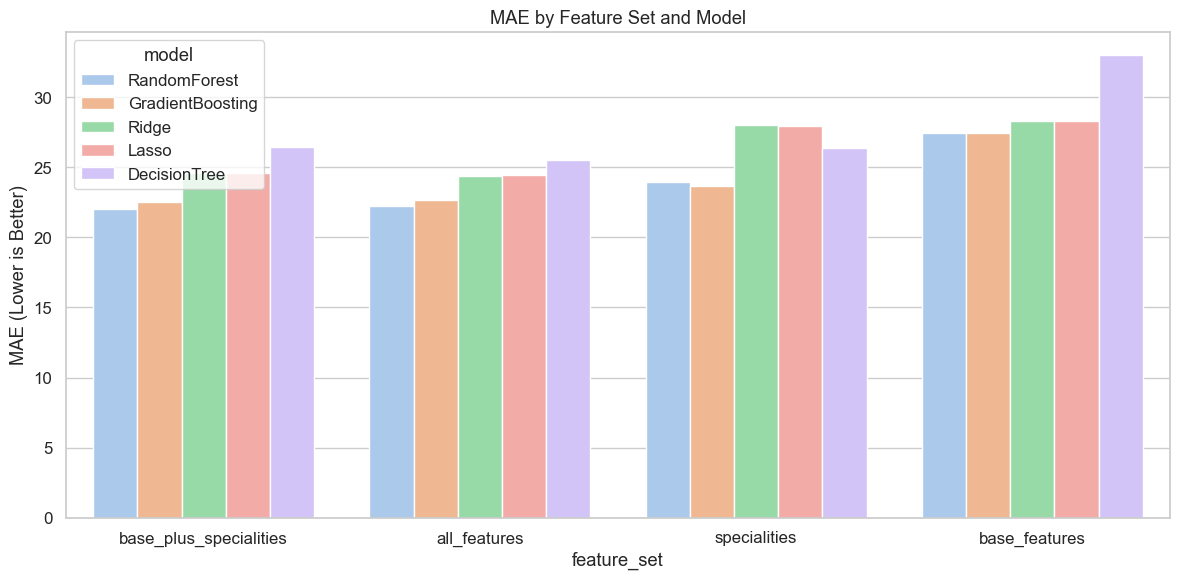

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='feature_set', y='MAE', hue='model', palette='pastel')
plt.title('MAE by Feature Set and Model')
plt.ylabel('MAE (Lower is Better)')
plt.tight_layout()
plt.show()


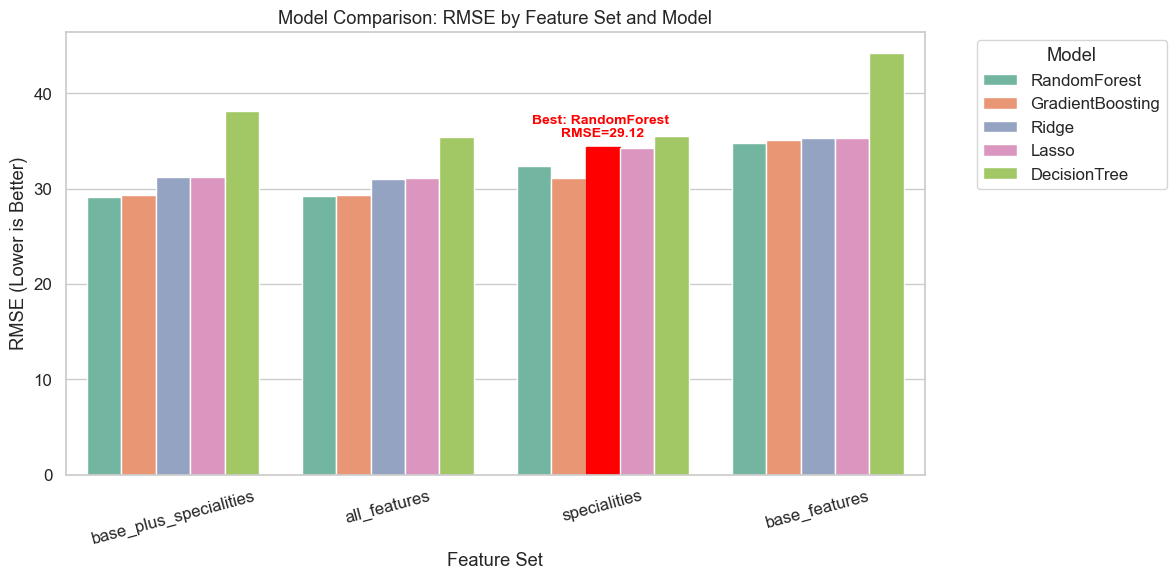

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(12, 6))

# Copy data to modify colors for highlighting
plot_data = results_df.copy()

# Find index of best model (lowest RMSE)
best_idx = plot_data['RMSE'].idxmin()

# Create a color palette where the best model is a standout color (e.g. red), others muted
palette = ['gray'] * len(plot_data)
palette[best_idx] = 'red'

# Create a new column for bar colors
plot_data['color'] = palette

# Plot with custom colors
bars = sns.barplot(
    data=plot_data,
    x='feature_set',
    y='RMSE',
    hue='model',
    palette='Set2',
    dodge=True
)

# Highlight best bar by changing its color to red (overriding palette)
for i, bar in enumerate(bars.patches):
    if i == best_idx:
        bar.set_color('red')

# Add annotation above the best bar
best_row = plot_data.loc[best_idx]
bars.annotate(
    f"Best: {best_row['model']} \nRMSE={best_row['RMSE']:.2f}",
    (bars.patches[best_idx].get_x() + bars.patches[best_idx].get_width() / 2, bars.patches[best_idx].get_height()),
    ha='center', va='bottom',
    fontsize=10,
    fontweight='bold',
    color='red',
    xytext=(0, 5),
    textcoords='offset points'
)

plt.title('Model Comparison: RMSE by Feature Set and Model')
plt.ylabel('RMSE (Lower is Better)')
plt.xlabel('Feature Set')
plt.xticks(rotation=15)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# Assuming results_df is your DataFrame with columns: feature_set, model, MAE, RMSE, R2

# Sort by RMSE ascending (best first)
results_sorted = results_df.sort_values(by='RMSE')

# # Option 1: Just print the table nicely in console
# print(results_sorted.reset_index(drop=True))

# # Option 2: Display in Jupyter Notebook as a nicely formatted table
# # (only works if you're in Jupyter or IPython)
# from IPython.display import display
# display(results_sorted.reset_index(drop=True))

# Optionally, if you want to highlight the best RMSE row in a Jupyter notebook:
def highlight_best(s):
    is_best = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_best]

styled = results_sorted.style.apply(highlight_best, subset=['RMSE'])
display(styled)


,feature_set,model,MAE,RMSE,R2
10,base_plus_specialities,RandomForest,21.997092,29.120022,0.559030
15,all_features,RandomForest,22.251548,29.270228,0.554469
11,base_plus_specialities,GradientBoosting,22.526040,29.344008,0.552220
16,all_features,GradientBoosting,22.691999,29.370085,0.551424
17,all_features,Ridge,24.352474,31.063084,0.498218
6,specialities,GradientBoosting,23.691448,31.073521,0.497881
18,all_features,Lasso,24.417556,31.155161,0.495239
13,base_plus_specialities,Lasso,24.597249,31.190167,0.494104
12,base_plus_specialities,Ridge,24.578685,31.198286,0.493840
5,specialities,RandomForest,23.931304,32.418540,0.453471


In [36]:
# Rerun test with other feature sets
# Define the feature sets you want to test
feature_sets = {
    'reduced_1': [
        'year_edition', 'bib_number', 'speciality_one_day_races',
        'speciality_gc', 'speciality_time_trial', 'speciality_climber',
        'speciality_hills', 'age', 'bmi'
    ],
    'reduced_1_plus_exp_team': [
        'year_edition', 'bib_number', 'speciality_one_day_races',
        'speciality_gc', 'speciality_time_trial', 'speciality_climber',
        'speciality_hills', 'age', 'bmi', 'experience', 'team_median_rank'
    ],
    'reduced_1_plus_exp': [
        'year_edition', 'bib_number', 'speciality_one_day_races',
        'speciality_gc', 'speciality_time_trial', 'speciality_climber',
        'speciality_hills', 'age', 'bmi', 'experience'
    ],
    'reduced_1_plus_team': [
        'year_edition', 'bib_number', 'speciality_one_day_races',
        'speciality_gc', 'speciality_time_trial', 'speciality_climber',
        'speciality_hills', 'age', 'bmi', 'team_median_rank'
    ]

}

# Run experiments on these sets
results_list = []

for name, features in feature_sets.items():
    print(f"Training model with feature set: {name}")
    model, results = train_evaluate_model(df_model_new, features)
    print(f"Results: MAE={results['MAE']:.2f}, RMSE={results['RMSE']:.2f}, R2={results['R2']:.3f}\n")
    results_list.append({'feature_set': name, **results})

# Show summary
results_df = pd.DataFrame(results_list).sort_values(by='RMSE')
print(results_df)



Training model with feature set: reduced_1
Results: MAE=23.24, RMSE=30.83, R2=0.506

Training model with feature set: reduced_1_plus_exp_team
Results: MAE=22.04, RMSE=29.22, R2=0.556

Training model with feature set: reduced_1_plus_exp
Results: MAE=23.14, RMSE=30.55, R2=0.515

Training model with feature set: reduced_1_plus_team
Results: MAE=22.24, RMSE=29.40, R2=0.550

               feature_set        MAE       RMSE        R2
1  reduced_1_plus_exp_team  22.038582  29.219015  0.556026
3      reduced_1_plus_team  22.235009  29.401725  0.550457
2       reduced_1_plus_exp  23.140000  30.549150  0.514684
0                reduced_1  23.242580  30.827572  0.505798


In [37]:
df_model_new.head()

,year_edition,rider_name,team,bib_number,nationality,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank,experience,team_median_rank,nationality_group
0,2023,ABRAHAMSEN Jonas,Uno-X Pro Cycling Team (PRT),202,NO,1.83,78.0,677,149,11,292,86,242,27,23.291230,77.0,0,78.0,Nordic
1,2014,ACEVEDO Janier,Garmin Sharp (WT),92,CO,1.75,63.0,91,582,212,6,304,166,28,20.571429,138.0,0,61.0,CO
2,2016,ALAPHILIPPE Julian,Etixx - Quick Step (WT),182,FR,1.73,62.0,6670,2738,1430,774,5331,4658,24,20.715694,39.0,0,150.0,FR
3,2018,ALAPHILIPPE Julian,Quick-Step Floors (WT),101,FR,1.73,62.0,6670,2738,1430,774,5331,4658,26,20.715694,30.0,1,59.0,FR
4,2019,ALAPHILIPPE Julian,Deceuninck - Quick Step (WT),21,FR,1.73,62.0,6670,2738,1430,774,5331,4658,27,20.715694,5.0,2,80.0,FR


In [39]:
df_model_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year_edition              1407 non-null   int64  
 1   rider_name                1407 non-null   object 
 2   team                      1407 non-null   object 
 3   bib_number                1407 non-null   int64  
 4   nationality               1407 non-null   object 
 5   height                    1407 non-null   float64
 6   weight                    1407 non-null   float64
 7   speciality_one_day_races  1407 non-null   int64  
 8   speciality_gc             1407 non-null   int64  
 9   speciality_time_trial     1407 non-null   int64  
 10  speciality_sprint         1407 non-null   int64  
 11  speciality_climber        1407 non-null   int64  
 12  speciality_hills          1407 non-null   int64  
 13  age                       1407 non-null   int64  
 14  bmi     

In [41]:
# Show number of rows and columns
print(f"Number of rows: {df_model_new.shape[0]}, Number of columns: {df_model_new.shape[1]}")

Number of rows: 1407, Number of columns: 19


In [43]:

print(df_model_new['rank'].describe())


count    1407.000000
mean       73.210377
std        44.375753
min         1.000000
25%        34.000000
50%        72.000000
75%       110.000000
max       175.000000
Name: rank, dtype: float64


Summary statistics for df_model_new['rank']:

count    1407.000000
mean       73.210377
std        44.375753
min         1.000000
25%        34.000000
50%        72.000000
75%       110.000000
max       175.000000
Name: rank, dtype: float64


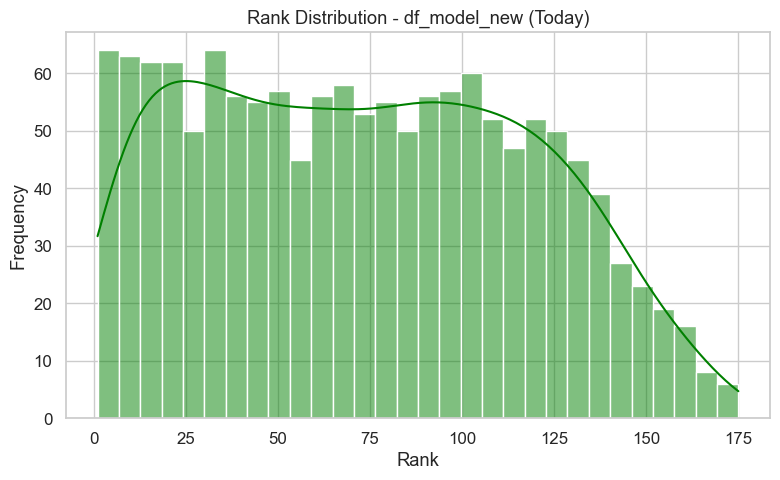

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary statistics for df_model_new['rank']:\n")
print(df_model_new['rank'].describe())

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_model_new['rank'], bins=30, kde=True, color='green')
plt.title("Rank Distribution - df_model_new (Today)")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
